# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city = city.replace(" ", "%20")
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

652

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Name url and extract data
url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&q={city}&units=Imperial"
url

'http://api.openweathermap.org/data/2.5/weather?appid=f14e04983804941f43212011d628db49&q=kutum&units=Imperial'

In [5]:
#Create empty lists for for loop
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxTemp = []
windSpeed = []

record = 1

#creat a for loop that loops through data. Also creat try and except statement and append response/url data.

for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&q={city}&units=Imperial"
    try:
        response = requests.get(url).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxTemp.append(response["main"]["temp"])
        windSpeed.append(response["wind"]["speed"])
        cityRecord = response["name"]
        print(f"Processing Record {record} | {cityRecord}")
        
        #Create a time function that will prevent you from being blocked for running the api too often.
        record= record + 1
        time.sleep(1.01)
    except:
        print("No City")
        print(response)
#g_key

Processing Record 1 | Sao Filipe
Processing Record 2 | Puerto Ayora
Processing Record 3 | Preeceville
Processing Record 4 | San Isidro
Processing Record 5 | Punta Arenas
Processing Record 6 | Mahebourg
Processing Record 7 | Avarua
Processing Record 8 | Chui
Processing Record 9 | Cape Town
Processing Record 10 | Bluff
Processing Record 11 | Port Elizabeth
Processing Record 12 | Mackay
Processing Record 13 | Yellowknife
Processing Record 14 | Vao
Processing Record 15 | Atuona
Processing Record 16 | Sitka
Processing Record 17 | Novouzensk
Processing Record 18 | Motomachi
Processing Record 19 | Lata
Processing Record 20 | Guaruja
No City
{'cod': '404', 'message': 'city not found'}
Processing Record 21 | Hermanus
Processing Record 22 | Jamestown
Processing Record 23 | Cururupu
Processing Record 24 | Altay
Processing Record 25 | Ulcinj
Processing Record 26 | Ushuaia
Processing Record 27 | Shingu
Processing Record 28 | Uvira
Processing Record 29 | Riyadh
Processing Record 30 | Hobart
Processi

Processing Record 227 | Bhadrachalam
No City
{'cod': '404', 'message': 'city not found'}
Processing Record 228 | Tucuma
Processing Record 229 | Ketchikan
No City
{'cod': '404', 'message': 'city not found'}
Processing Record 230 | Khatanga
Processing Record 231 | Fagernes
Processing Record 232 | Imbituba
Processing Record 233 | Ancud
Processing Record 234 | Marsh Harbour
Processing Record 235 | Dawei
Processing Record 236 | Vestmannaeyjar
Processing Record 237 | Vardo
Processing Record 238 | Nam Dinh
Processing Record 239 | Paita
Processing Record 240 | Zaliztsi
Processing Record 241 | Kraskino
Processing Record 242 | Qui Nhon
Processing Record 243 | Karacakoy
Processing Record 244 | Shebunino
Processing Record 245 | Lucapa
Processing Record 246 | Pringsewu
Processing Record 247 | Makakilo City
Processing Record 248 | Dryden
Processing Record 249 | Nanortalik
Processing Record 250 | Sur
Processing Record 251 | Road Town
Processing Record 252 | Terra Santa
Processing Record 253 | Gariaba

Processing Record 440 | Kribi
No City
{'cod': '404', 'message': 'city not found'}
Processing Record 441 | Montepuez
Processing Record 442 | Kavieng
Processing Record 443 | Yuncheng
Processing Record 444 | Boadilla del Monte
Processing Record 445 | Ha Giang
Processing Record 446 | Severo-Kuril'sk
Processing Record 447 | Qaqortoq
Processing Record 448 | Boyolangu
Processing Record 449 | Itapirapua
Processing Record 450 | Manokwari
Processing Record 451 | Borazjan
Processing Record 452 | Hamilton
No City
{'cod': '404', 'message': 'city not found'}
Processing Record 453 | Thinadhoo
Processing Record 454 | Grand Gaube
Processing Record 455 | Haines Junction
Processing Record 456 | Gibsons
Processing Record 457 | Rocha
Processing Record 458 | Bay-Khaak
Processing Record 459 | Sosnovo-Ozerskoye
Processing Record 460 | Lambarene
Processing Record 461 | Tianpeng
Processing Record 462 | Nizhniy Baskunchak
Processing Record 463 | Chapais
Processing Record 464 | Kununurra
Processing Record 465 | A

In [6]:
#Printed out cities to make sure there were multiple cities.
print(cities)

['sao%20filipe', 'puerto%20ayora', 'preeceville', 'san%20isidro', 'punta%20arenas', 'mahebourg', 'avarua', 'chuy', 'cape%20town', 'bluff', 'port%20elizabeth', 'mackay', 'yellowknife', 'vao', 'atuona', 'sitka', 'novouzensk', 'bihoro', 'lata', 'guaruja', 'mys%20shmidta', 'hermanus', 'jamestown', 'cururupu', 'altay', 'ulcinj', 'ushuaia', 'shingu', 'uvira', 'riyadh', 'hobart', 'umm%20kaddadah', 'bilma', 'bandarbeyla', 'taolanaro', 'acapulco', 'pacific%20grove', 'zhigansk', 'fortuna', 'new%20norfolk', 'arraial%20do%20cabo', 'le%20portel', 'sinnamary', 'kapaa', 'sentyabrskiy', 'butaritari', 'amderma', 'clyde%20river', 'kloulklubed', 'port%20alfred', 'gat', 'san%20juan%20de%20uraba', 'victoria', 'cayenne', 'turbat', 'barrow', 'japura', 'nurmijarvi', 'tasiilaq', 'kenai', 'cap%20malheureux', 'townsville', 'guerrero%20negro', 'quijingue', 'lagoa', 'albany', 'rikitea', 'luanda', 'grand%20river%20south%20east', 'ihosy', 'rawson', 'udachnyy', 'bathsheba', 'mataura', 'zharkent', 'cherskiy', 'hithadh

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
#Create a dictionary with all columns inside for data frame.
weatherDict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": maxTemp,
    "Wind Speed":windSpeed
}
weatherData = pd.DataFrame(weatherDict)
weatherData

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0      Sao Filipe           0      CV  1580166287        56  14.90  -24.50   
1    Puerto Ayora          40      EC  1580166288        62  -0.74  -90.35   
2     Preeceville          64      CA  1580166289        95  51.95 -102.67   
3      San Isidro          75      PE  1580166291        83 -12.12  -77.05   
4    Punta Arenas         100      CL  1580166036        66 -53.15  -70.92   
..            ...         ...     ...         ...       ...    ...     ...   
598    Novoagansk         100      RU  1580167075        95  61.94   76.66   
599        Noumea          62      NC  1580167061        45 -22.28  166.46   
600       Ahipara           0      NZ  1580167078        62 -35.17  173.17   
601      Bilibino         100      RU  1580167079        84  68.05  166.44   
602         Kutum          85      SD  1580167080        25  14.20   24.67   

     Max Temp  Wind Speed  
0       74.48       15.73  
1       80.11        5.82  
2        9.50        4.45  
3       77.00       14.99  
4       53.29       20.80  
..        ...         ...  
598     14.41        8.59  
599     85.77       10.29  
600     91.00       10.18  
601      0.01        2.51  
602     47.03        3.47  

[603 rows x 9 columns]

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

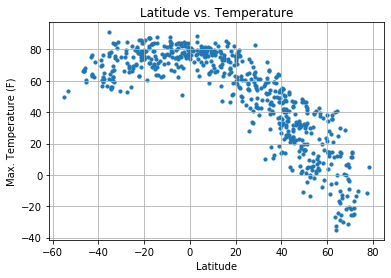

In [12]:
#Create a scatter plot that shows Latitude vs Temperature.
plt.scatter(weatherData["Lat"], weatherData["Max Temp"], marker="o", s=10)

#Include other graph data
plt.title("Latitude vs. Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

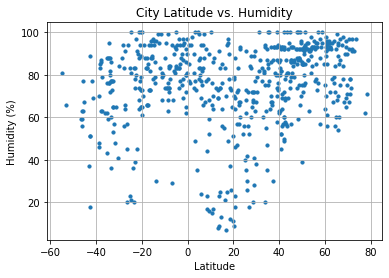

In [16]:
# Build a scatter plot for Latitude vs Humidity
plt.scatter(weatherData["Lat"], weatherData["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

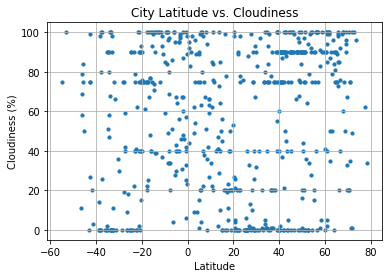

In [17]:
# Build a scatter plot for Latitude vs Cloudiness

plt.scatter(weatherData["Lat"], weatherData["Cloudiness"], marker="o", s=10)
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

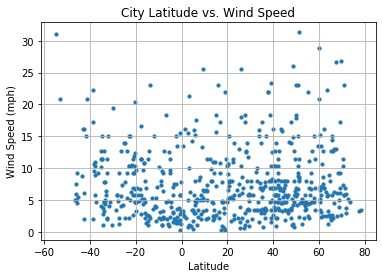

In [19]:
# Build a scatter plot for Latitude vs Wind Speed
plt.scatter(weatherData["Lat"], weatherData["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

## Linear Regression

In [42]:
# OPTIONAL: Create a function to create Linear Regression plots
# That way you can call your function once.
def plotLinReg(x_values, y_values, label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(label)
    plt.ylabel('Latitude')
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [43]:
# Create Northern and Southern Hemisphere DataFrames
#Create a northern hem Data Frame with appropriate columns
cityDataNorth = weatherData[weatherData["Lat"] > 0]


cloudinessNorth = cityDataNorth["Cloudiness"]
humidityNorth = cityDataNorth["Humidity"]
latitudeNorth = cityDataNorth["Lat"]
maxTempNorth = cityDataNorth["Max Temp"]
windSpeedNorth = cityDataNorth["Wind Speed"]

#Create a southern hem Data Frame with appropriate columns
cityDataSouth = weatherData[weatherData["Lat"] < 0]

cloudinessSouth = cityDataSouth["Cloudiness"]
humiditySouth = cityDataSouth["Humidity"]
latitudeSouth = cityDataSouth["Lat"]
maxTempSouth = cityDataSouth["Max Temp"]
windSpeedSouth = cityDataSouth["Wind Speed"]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8758551114116537


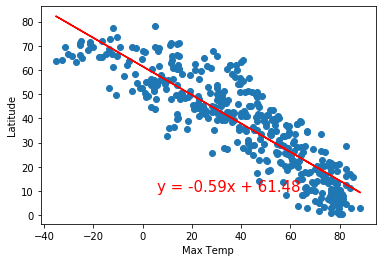

In [47]:
#Create a linear regression that correlates the latitude(distance from sun) to the decrease in temperature. Repeat  this step for all other graphs.
x_values = maxTempNorth
y_values = latitudeNorth
label = "Max Temp"
plotLinReg(x_values, y_values, label)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4740819196202261


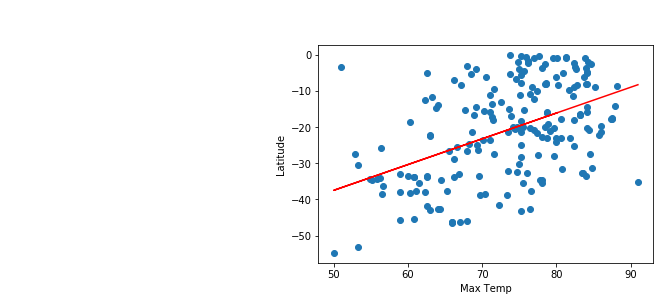

In [49]:
x_values = maxTempSouth
y_values = latitudeSouth
label = "Max Temp"
plotLinReg(x_values, y_values, label)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.34180516835097974


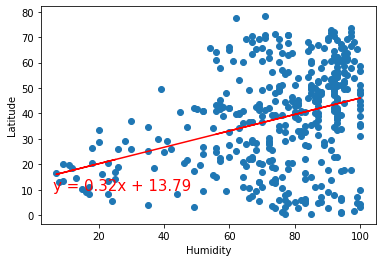

In [51]:
x_values = humidityNorth
y_values = latitudeNorth
label = "Humidity"
plotLinReg(x_values, y_values, label)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.36104568202359677


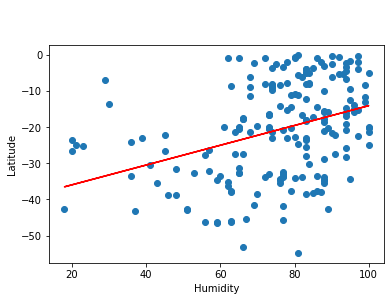

In [55]:
x_values = humiditySouth
y_values = latitudeSouth
label = "Humidity"
plotLinReg(x_values, y_values, label)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2326725510610712


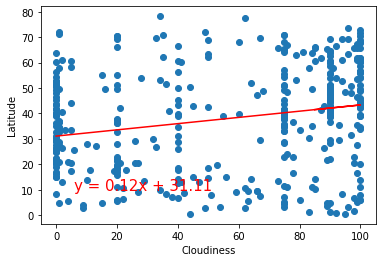

In [53]:
x_values = cloudinessNorth
y_values = latitudeNorth
label = "Cloudiness"
plotLinReg(x_values, y_values, label)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2161457531459882


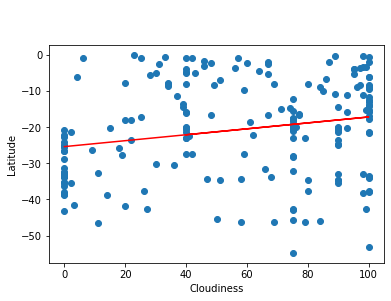

In [56]:
x_values = cloudinessSouth
y_values = latitudeSouth
label = "Cloudiness"
plotLinReg(x_values, y_values, label)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07054617623836028


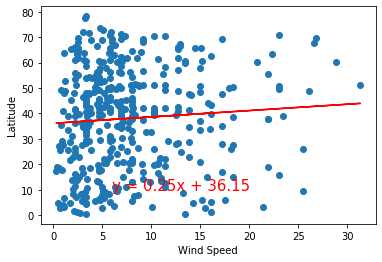

In [59]:
x_values = windSpeedNorth
y_values = latitudeNorth
label = "Wind Speed"
plotLinReg(x_values, y_values, label)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3100159476114837


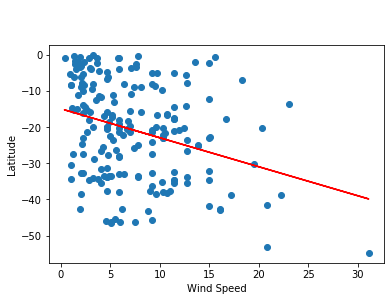

In [61]:
x_values = windSpeedSouth
y_values = latitudeSouth
label = "Wind Speed"
plotLinReg(x_values, y_values, label)